# Education Project
## Introduction
This project examines how standardized achievement outcomes relate to school-level context across the United States. We integrate achievement metrics such as ACT scores with socioeconomic indicators and detailed school attributes to explore patterns, anomolies, and potential drivers of performance.

## Data
*   **`EdGap_data.xlsx`**: This dataset, from EdGap.org, data on average ACT/SAT scores for schools, along with socioeconomic characteristics of their surrounding census tracts. Variables include unemployment rates, college degree percentages, family structures, median household income, and the percentage of students eligible for free or reduced-price lunch.

*   **`ccd_sch_029_1617_w_1a_11212017.csv`**: Sourced from the National Center for Education Statistics (NCES) Common Core of Data for the 2016-2017 academic year, this file provides essential identifying and categorical information about schools, such as names, locations, types, educational levels, and charter status.

*   **`school_info.csv`**: This supplemental dataset offers additional school-level characteristics, including school year, NCESSCH ID, state, zip code, school type, and educational level, which will enhance the analysis by providing further context.



## Install Library

In [161]:
pip install -r "/Users/dcnguyen060899/Downloads/First_Quarter_Seattle_U_2025:2026/DATA_5100-01/education/requirements.txt"


Note: you may need to restart the kernel to use updated packages.


In [162]:
pip install openpyxl


Note: you may need to restart the kernel to use updated packages.


## Data Loading and Initial Exploration

In this section, we will load the primary datasets required for our analysis and conduct an initial exploration to understand our data's structure, content, and data quality. This initial step will help us identify any immediate data issues and plan our subsequent and iterative processing steps. 

In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# settings to display all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

### Loading EdGap data set


In [164]:
edgap_df = pd.read_excel('/Users/dcnguyen060899/Downloads/First_Quarter_Seattle_U_2025:2026/DATA_5100-01/education/data/EdGap_data.xlsx')


/opt/homebrew/Cellar/jupyterlab/4.4.7/libexec/lib/python3.13/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning:

Unknown extension is not supported and will be removed



Let's take a look at first feel rows

In [165]:
edgap_df.head()

,NCESSCH School ID,CT Unemployment Rate,CT Pct Adults with College Degree,CT Pct Childre In Married Couple Family,CT Median Household Income,School ACT average (or equivalent if SAT score),School Pct Free and Reduced Lunch
0,100001600143,0.117962,0.445283,0.346495,42820.0,20.433455,0.066901
1,100008000024,0.063984,0.662765,0.767619,89320.0,19.498168,0.112412
2,100008000225,0.056460,0.701864,0.713090,84140.0,19.554335,0.096816
3,100017000029,0.044739,0.692062,0.641283,56500.0,17.737485,0.296960
4,100018000040,0.077014,0.640060,0.834402,54015.0,18.245421,0.262641


Now examine the data structure and data types

In [166]:
edgap_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7986 entries, 0 to 7985
Data columns (total 7 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   NCESSCH School ID                                7986 non-null   int64  
 1   CT Unemployment Rate                             7972 non-null   float64
 2   CT Pct Adults with College Degree                7973 non-null   float64
 3   CT Pct Childre In Married Couple Family          7961 non-null   float64
 4   CT Median Household Income                       7966 non-null   float64
 5   School ACT average (or equivalent if SAT score)  7986 non-null   float64
 6   School Pct Free and Reduced Lunch                7986 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 436.9 KB


Let's observe some summary statistics

In [167]:
edgap_df.describe(include='all')

,NCESSCH School ID,CT Unemployment Rate,CT Pct Adults with College Degree,CT Pct Childre In Married Couple Family,CT Median Household Income,School ACT average (or equivalent if SAT score),School Pct Free and Reduced Lunch
count,7.986000e+03,7972.000000,7973.000000,7961.000000,7966.000000,7986.000000,7986.000000
mean,3.321869e+11,0.098730,0.568930,0.633440,52026.905222,20.181532,0.420651
std,1.323638e+11,0.058959,0.165704,0.196764,24228.057079,2.595201,0.239754
min,1.000016e+11,0.000000,0.091493,0.000000,3589.000000,-3.070818,-0.054545
25%,2.105340e+11,0.058655,0.450828,0.523810,36597.250000,18.600000,0.238501
50%,3.600085e+11,0.085649,0.554979,0.667594,46833.500000,20.400000,0.381570
75%,4.226678e+11,0.123376,0.676571,0.777135,61369.250000,21.910867,0.575447
max,5.605830e+11,0.590278,1.000000,1.000000,226181.000000,32.362637,0.998729


### Initial Observations from EdGap Dataset
- Contains 7986 schools observations with seven variables
- Most of columns contain nearly complete data, but of course, there are minor missing data
    - There are missing data in sever socioeconomic variables 
    - Percentage of children in married couple familes showing the most missing value at 25 observations

- ACT Score (act_avg):
    - The mean score is 20.18 with standard deviation of 2.6
    - The minimum score has an impossible value of -3.07, this imposed a data quality issue
- Free and Reduced Lunch (frl_percent):
    - Another invalid value of -0.054
- Socioeconomic Variables:
    - These variables show significant variation across different schools
    - Unemployment rate range from 0% to 59%
    - College degree attainment rate varies from 9% to 100%
    - Median household income range from $3600 to over $226000
- Conclusion on Data Quality:
    - The presence of negative values in key columns implies that there were data entry errors require us, as a data scientist to deal with it rigorously before analysis.

## Accessing Data Suitability Through Visualization
This step will help us determine whether the data can adequately address our research question regarding the relationship between ACT scores and socioecononmic factor. Let's create a pair plot to visualize the relationships between all numerical variables in the EdGap dataset. This visualization technique allows us to examine multiple bivariate relationships simultaneously and identify potential patterns, correlations, and data quality issues that might affect our analysis.

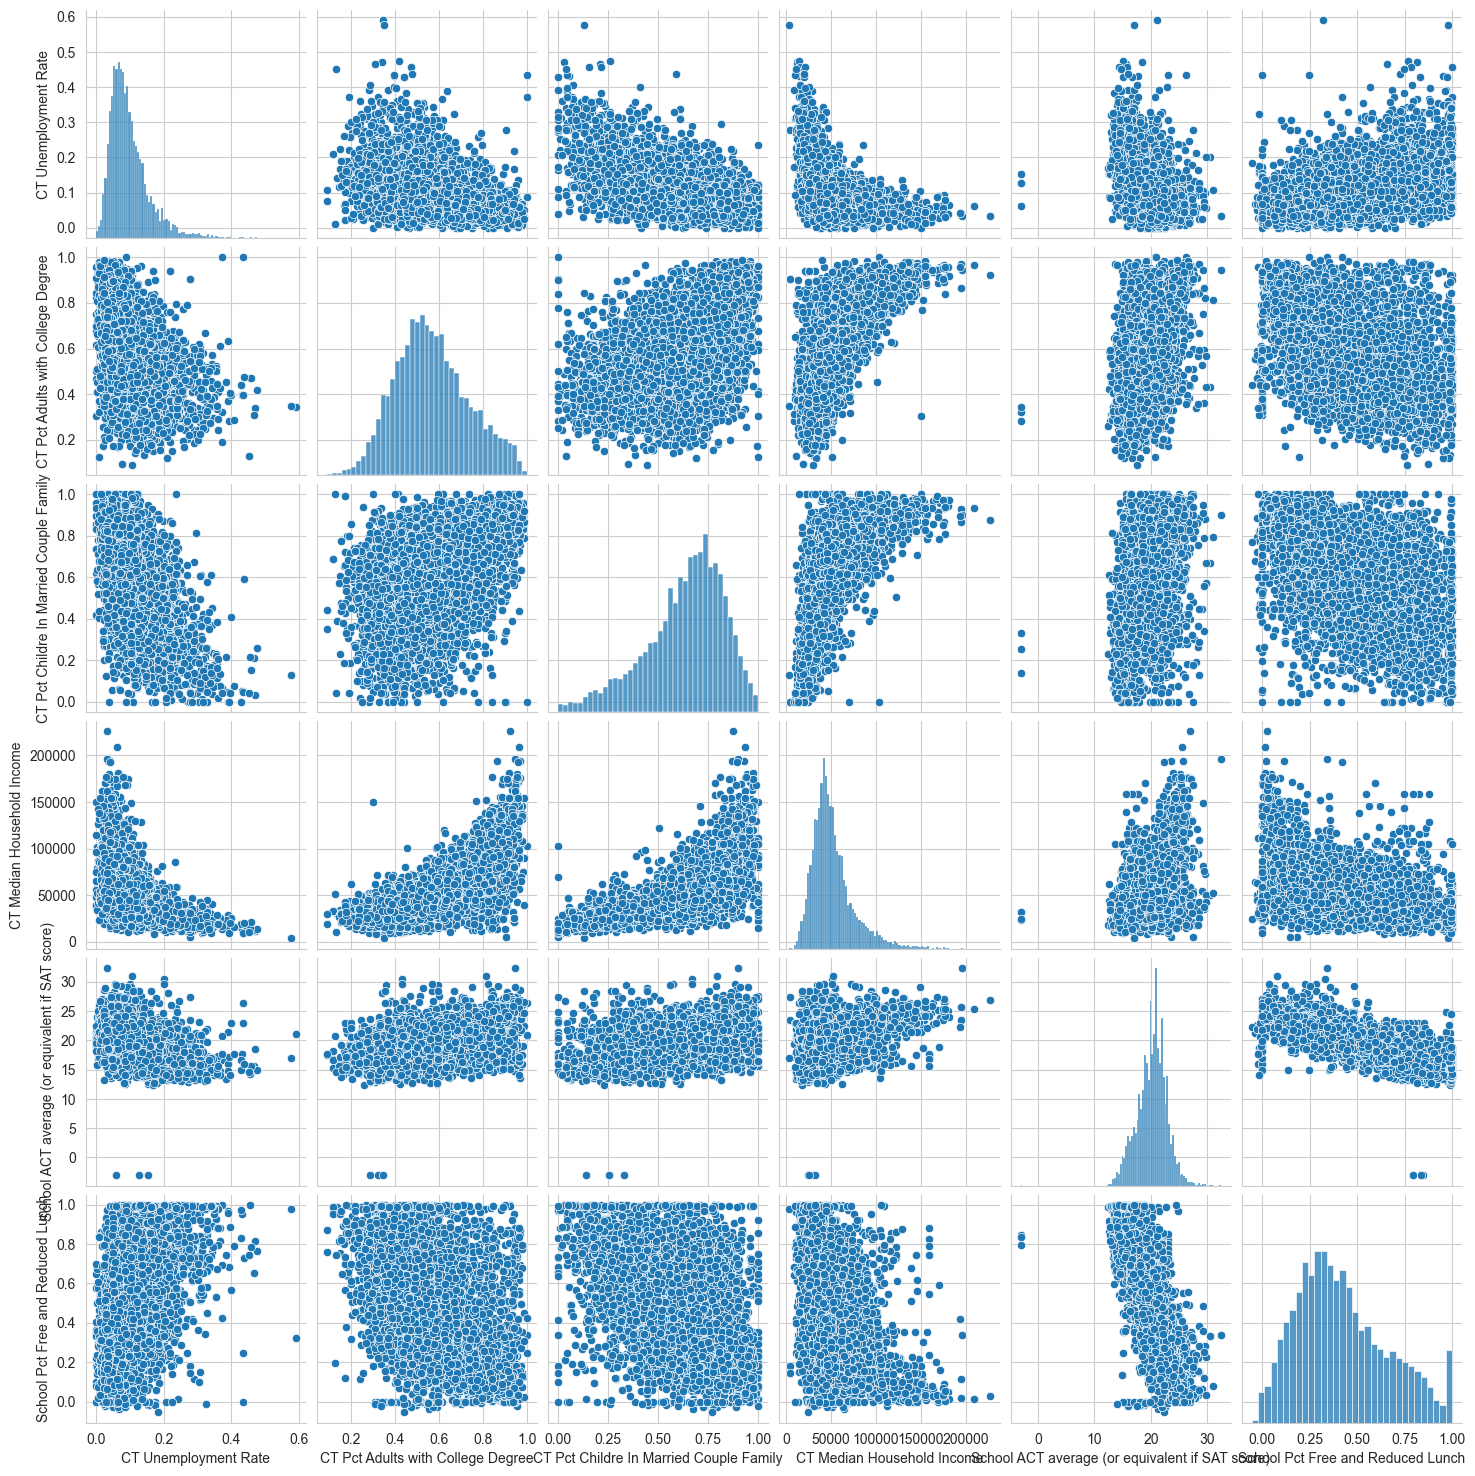

In [168]:
sns.pairplot(edgap_df.drop(columns="NCESSCH School ID"));
plt.show()

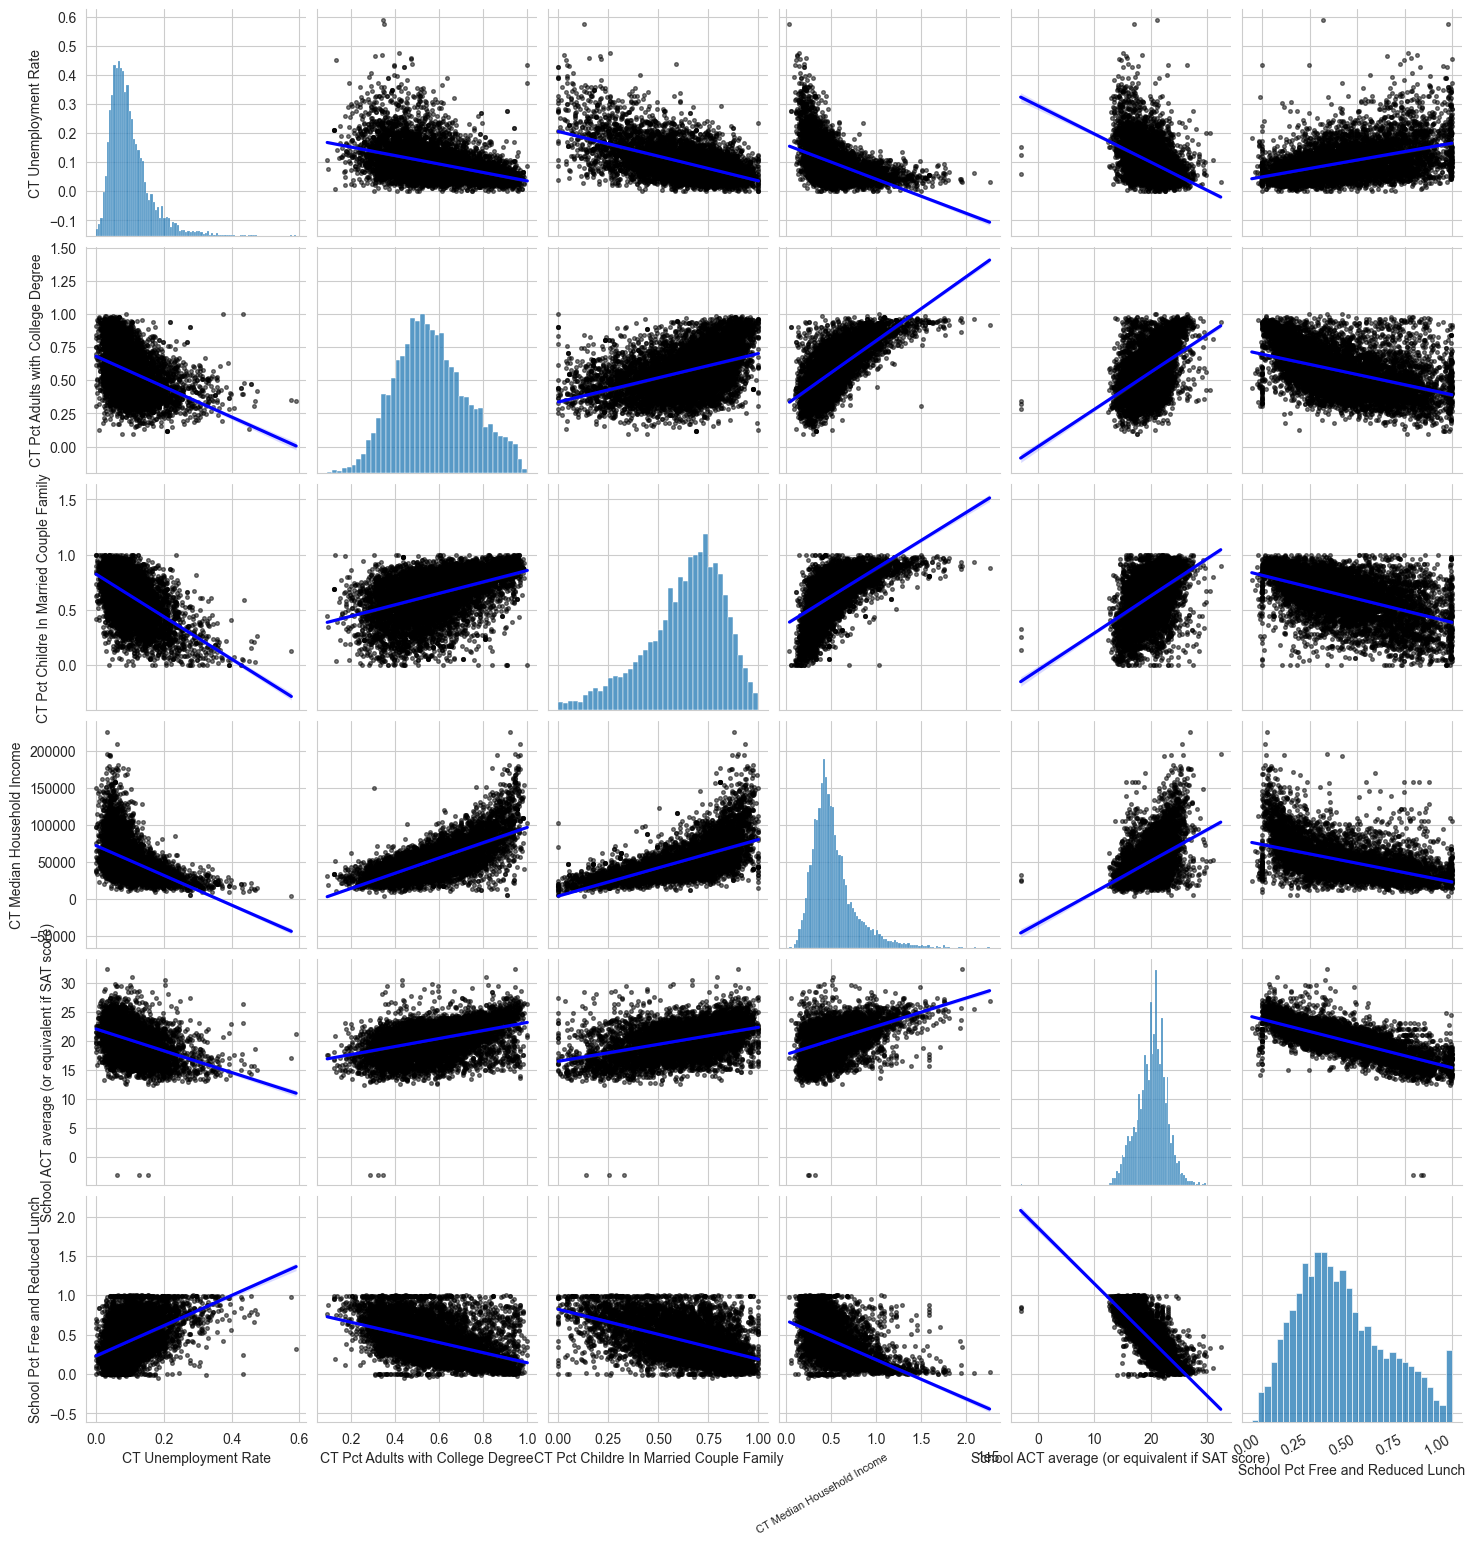

In [169]:
# pair plot with regression lines and custom formatting
fig = sns.pairplot(
    edgap_df.drop(columns="NCESSCH School ID"),
    kind="reg",
    plot_kws={
        "line_kws": {"color": "blue"},
        "scatter_kws": {"alpha": 0.5, "color": "k", "s": 7}
    }
)

# the x-axis for median household income using scientific notation
for ax in fig.axes.flat:
    if ax.get_xlabel() == 'CT Median Household Income':
        ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))  # Apply scientific notation
        ax.set_xlabel(ax.get_xlabel(), fontsize=8, rotation=30, ha='right')  # X-axis label size and rotation
        ax.set_ylabel(ax.get_ylabel(), fontsize=8)  # Y-axis label size

# Rotate x-axis tick labels
plt.setp(ax.get_xticklabels(), rotation=30, ha='right')

plt.show()

### Initial Observation of Pair PLot Visualization
Simple Pair Plot :
- Displaying all pairwise relationship between socioeconomics variables and ACT scores
- Data quality issues are immediately visible, including negative ACT scores and negative free lunch percentages that violate logical constraints
- Histograms on the diagonal reveal the distribution shape of each variable, with most appearing reasonably distributed though median income shows right skewness
- The scatter plots suggest potential relationships between predictors and outcomes, though trends are less obvious without fitted lines

Pair Plot with Regression:
- Negative relationships are evident between unemployment rate and ACT scores, and between free lunch percentage and ACT scores, indicating that schools in higher unemployment areas or serving more economically disadvantaged students tend to show lower achievement
- There appeared to be a strong positive relationships happen between the percentage of adults with college degrees and ACT scores, and between median household income and ACT scores, suggesting that community educational attainment and economic resources correlate with student performance
- The percentage of children in married couple families shows a moderate positive relationship with ACT scores


## Load School Information Dataset


In [170]:
school_information = pd.read_csv(
    "/Users/dcnguyen060899/Downloads/First_Quarter_Seattle_U_2025:2026/DATA_5100-01/education/data/ccd_sch_029_1617_w_1a_11212017.csv",
    encoding='unicode_escape')

/var/folders/v5/s7m5yfm11_qc71fz_fdnk7br0000gn/T/ipykernel_61380/2214545275.py:1: DtypeWarning:

Columns (6,9,14,15,18,19,21,22,25,26,29,31,35,39,41,42) have mixed types. Specify dtype option on import or set low_memory=False.



In [171]:
school_information.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102183 entries, 0 to 102182
Data columns (total 65 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SCHOOL_YEAR          102183 non-null  object 
 1   FIPST                102183 non-null  int64  
 2   STATENAME            102183 non-null  object 
 3   ST                   102183 non-null  object 
 4   SCH_NAME             102183 non-null  object 
 5   LEA_NAME             102183 non-null  object 
 6   STATE_AGENCY_NO      102183 non-null  object 
 7   UNION                2533 non-null    float64
 8   ST_LEAID             102183 non-null  object 
 9   LEAID                102183 non-null  object 
 10  ST_SCHID             102183 non-null  object 
 11  NCESSCH              102181 non-null  float64
 12  SCHID                102181 non-null  float64
 13  MSTREET1             102181 non-null  object 
 14  MSTREET2             1825 non-null    object 
 15  MSTREET3         

## Data Preparation:
#### First Step: Selecting Relevant Subset of Data

In [172]:
school_information = school_information[
    ['SCHOOL_YEAR', 'NCESSCH', 'LSTATE', 'LZIP', 'SCH_TYPE_TEXT', 'LEVEL', 'CHARTER_TEXT']
]

### Rename Column

In [173]:
edgap_df = edgap_df.rename(
    columns={
        "NCESSCH School ID": "id",
        "CT Pct Adults with College Degree": "percent_college",
        "CT Unemployment Rate": "rate_unemployment",
        "CT Pct Childre In Married Couple Family": "percent_married",
        "CT Median Household Income": "median_income",
        "School ACT average (or equivalent if SAT score)": "average_act",
        "School Pct Free and Reduced Lunch": "percent_lunch",
    }
)

In [174]:
edgap_df.head()

,id,rate_unemployment,percent_college,percent_married,median_income,average_act,percent_lunch
0,100001600143,0.117962,0.445283,0.346495,42820.0,20.433455,0.066901
1,100008000024,0.063984,0.662765,0.767619,89320.0,19.498168,0.112412
2,100008000225,0.056460,0.701864,0.713090,84140.0,19.554335,0.096816
3,100017000029,0.044739,0.692062,0.641283,56500.0,17.737485,0.296960
4,100018000040,0.077014,0.640060,0.834402,54015.0,18.245421,0.262641


In [175]:
school_information = school_information.rename(
    columns={
        "SCHOOL_YEAR": "year",
        "NCESSCH": "id",
        "LSTATE": "state",
        "LZIP": "zip_code",
        "SCH_TYPE_TEXT": "school_type",
        "LEVEL": "school_level",
        "CHARTER_TEXT": "charter"
    }
)

In this data preparation stage, we reduce the school information dataset to only the essential columns needed for our analysis and standardize all column names to follow lowercase snake case conventions. This preprocessing step simplifies subsequent operations by eliminating unnecessary variables, reduces the cognitive load when working with the data, and ensures consistency across both datasets before joining. By renaming the key variable to match in both dataframes before the merge, we make the join operation more transparent and our code more maintainable, establishing good habits that prevent errors and confusion as the project grows in complexity.

## Joining the Dataset

School information dateset column id is currently a float, in order to merge with id column form edgap dataset, we need to convert id to object

In [176]:
school_information['id'] = school_information['id'].astype('object')

Now we can merge:

In [177]:
edgap_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7986 entries, 0 to 7985
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 7986 non-null   int64  
 1   rate_unemployment  7972 non-null   float64
 2   percent_college    7973 non-null   float64
 3   percent_married    7961 non-null   float64
 4   median_income      7966 non-null   float64
 5   average_act        7986 non-null   float64
 6   percent_lunch      7986 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 436.9 KB


Since edgap dataset as a primary dataset, containing critical outcome variable of ACT scores along with the socioeconomic preditors, hence, we use left merge to the primary dataset avoiding missing important datapoints

In [178]:
df = edgap_df.merge(
    school_information,
    how='left',
    on='id'
)

## Quality Control

This subsection, we will clean and validate the merged dataset by correcting errors, filtering for relevant school, and removing duplicate if we have.

In [179]:
df.describe()

,rate_unemployment,percent_college,percent_married,median_income,average_act,percent_lunch
count,7972.000000,7973.000000,7961.000000,7966.000000,7986.000000,7986.000000
mean,0.098730,0.568930,0.633440,52026.905222,20.181532,0.420651
std,0.058959,0.165704,0.196764,24228.057079,2.595201,0.239754
min,0.000000,0.091493,0.000000,3589.000000,-3.070818,-0.054545
25%,0.058655,0.450828,0.523810,36597.250000,18.600000,0.238501
50%,0.085649,0.554979,0.667594,46833.500000,20.400000,0.381570
75%,0.123376,0.676571,0.777135,61369.250000,21.910867,0.575447
max,0.590278,1.000000,1.000000,226181.000000,32.362637,0.998729


In [180]:
df.select_dtypes(include=['number']).agg(['min', 'max']).round(2)

,rate_unemployment,percent_college,percent_married,median_income,average_act,percent_lunch
min,0.00,0.09,0.0,3589.0,-3.07,-0.05
max,0.59,1.00,1.0,226181.0,32.36,1.00


In [181]:
df.loc[df['percent_lunch'] < 0, 'percent_lunch'] = np.nan

In [182]:
df.loc[df['average_act'] < 1, 'average_act'] = np.nan

In [183]:
df['school_type'].value_counts()

school_type
Regular School                 7885
Alternative School               10
Special Education School          2
Career and Technical School       1
Name: count, dtype: int64

In [184]:
df['school_level'].value_counts()

school_level
High            7230
Other            631
Not reported      35
Elementary         2
Name: count, dtype: int64

In [185]:
df['charter'].value_counts()

charter
No                7329
Yes                352
Not applicable     217
Name: count, dtype: int64

In [186]:
df = df.loc[df['school_level'] == 'High']

In [187]:
df.duplicated().sum()

np.int64(0)

### Quality Controll Summary:
In this quality control stage:
- We systematically identify and address data integrity issues by checking variables against their natural bounds such that ACT scores must fall between 1 and 36, while percentages must range from 0 to 1. Rather than deleting entire rows containing invalid values where we would lose all the socioeconomics data, we set out-of-range values to NaN to preserve other valid information for those schools, maximizing our usable data. 
- We then filter the dataset to retain only high schools, since elementary and unspecified school levels are inappropriate for ACT testing. 
- Lastly, we verify that no duplicate rows exist in the merged dataset. This process ensures our subsequent analysis builds on clean, trustworthy data while maintaining the largest possible sample size for statistically robust results.Retry

### Dealing With Missing Data

Do we have missing values?

In [188]:
df.isna().sum().to_frame(name='Number of Missing Values')

,Number of Missing Values
id,0
rate_unemployment,12
percent_college,11
percent_married,20
median_income,16
average_act,3
percent_lunch,20
year,0
state,0
zip_code,0


Yes we do, what percentage of values of each variable are missing?

In [189]:
percent_missing = df.isna().mean().round(4) * 100

percent_missing.to_frame(name='Percent Missing Values')

,Percent Missing Values
id,0.00
rate_unemployment,0.17
percent_college,0.15
percent_married,0.28
median_income,0.22
average_act,0.04
percent_lunch,0.28
year,0.00
state,0.00
zip_code,0.00


How many states do we have data from?

In [190]:
df['state'].value_counts()

state
TX    913
OH    654
IL    564
PA    543
MI    498
NC    407
FL    404
GA    367
WI    351
NJ    341
MO    337
IN    321
NY    295
TN    265
WA    263
MA    253
KY    198
LA    194
WY     38
DE     24
Name: count, dtype: int64

In [191]:
print("we have", df['state'].nunique(), 'states')

we have 20 states


Let's visualize it on a map

In [192]:
import plotly.offline as po
import plotly.graph_objs as pg

layout = dict(
    geo={"scope": "usa"}, coloraxis_colorbar=dict(title="Number of Schools")
)

data = dict(
    type="choropleth",
    locations=df["state"].value_counts().index,
    locationmode="USA-states",
    z=df["state"].value_counts().values,
    coloraxis="coloraxis",
)

x = pg.Figure(data=[data], layout=layout)

po.iplot(x)

Missing data due to omission isn't evident by th number of NaN. We could theoretical get more date but not in the scope of this project

In [193]:
df = df.dropna(subset=['average_act'])
df.isna().sum().to_frame(name='Number of Missing Values')

,Number of Missing Values
id,0
rate_unemployment,12
percent_college,11
percent_married,20
median_income,16
average_act,0
percent_lunch,20
year,0
state,0
zip_code,0


Since ACT score is our outcome variable, that is the thing we are trying to predict, hence it won't contribute much to our analysis. Meanwhile, all the rest of NaN are in rows that has socioeconomics information, our predictors (dependent values), we don't want to just simply drop those because it will affect our analysis. Instead, we will impute the missing predictor. Plus, we have a only a 0.04 missing value from average ACT

### Data Imputation

In [194]:
predictor_variables = [
    'rate_unemployment',
    'percent_college',
    'percent_married',
    'median_income',
    'percent_lunch',
    'state',
    'charter'
]

In [195]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer()

numerical_predictors = df[predictor_variables].select_dtypes(include='number').columns.to_list()

print(numerical_predictors)

['rate_unemployment', 'percent_college', 'percent_married', 'median_income', 'percent_lunch']


This code select only numeric value for imputation to work, notice charter and state did not include and happened that those two does not missing value as well. So in the future make sure imputation include categorical value as well if there is missing value!

In [196]:
imputer.fit(df.loc[:, numerical_predictors])

,estimator,None
,missing_values,nan
,sample_posterior,False
,max_iter,10
,tol,0.001
,n_nearest_features,None
,initial_strategy,'mean'
,fill_value,None
,imputation_order,'ascending'
,skip_complete,False
,min_value,-inf


Behind this impute, it trains a model for accurate prediction, then we use that to predict the approriate value according to the model it fit

In [197]:
df.loc[:, numerical_predictors] = imputer.transform(df.loc[:, numerical_predictors])

Now double check if we have missing value anymore:

In [198]:
df.isna().sum().to_frame(name='Number of Missing Values')

,Number of Missing Values
id,0
rate_unemployment,0
percent_college,0
percent_married,0
median_income,0
average_act,0
percent_lunch,0
year,0
state,0
zip_code,0


Now the data is ready to be saved

In [199]:
df.to_csv(
    '/Users/dcnguyen060899/Downloads/First_Quarter_Seattle_U_2025:2026/DATA_5100-01/education/data/education_clean.csv',
    encoding='utf-8-sig',
    index=False
)

# Exploratory Data Analsysis

Now that we obtained our clean dataset that is ready for our analysis through data analysis and visualization. First we want to look at the correlation between our numerical predictors variable to our independent variable (average_act)

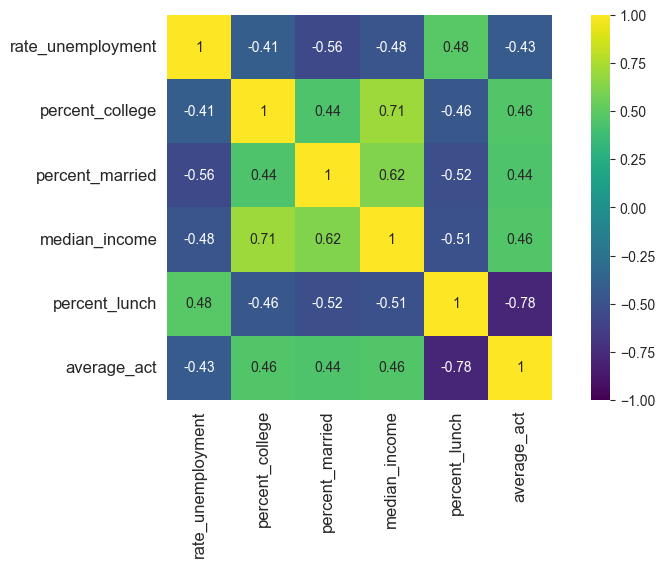

In [200]:
predictor_variables = [
    'rate_unemployment', 'percent_college', 'percent_married',
    'median_income',  'percent_lunch', 'state', 'charter'
]

numerical_predictors = (
    df[predictor_variables]
      .select_dtypes(include='number')
      .columns
      .to_list()
)

corr_matrix = df[numerical_predictors + ["average_act"]].corr()

plt.figure(figsize=(10, 5))
sns.heatmap(
    corr_matrix,
    vmax=1, vmin=-1,
    square=True,
    annot=True,
    cmap="viridis"
)
plt.tick_params(labelsize=12)
plt.show()


Several thing I've noticed from this observation:
- Average ACT score has a strong negatibe correlation (-.78) wwith the percentage of students receiving free or reduced-price lunch (percent_lunch)
- The figure shows moderate positive correlation with the percentage of adults with a college degree (percent_college), median household income (median_income), and percentage of children in married-couple family (percent_married)
- Moderate negative correlation with the unemploymnt rate (rate_unemployment)

So among these predictors, percent_college and median_income are strongly correlated with each other (0.71)

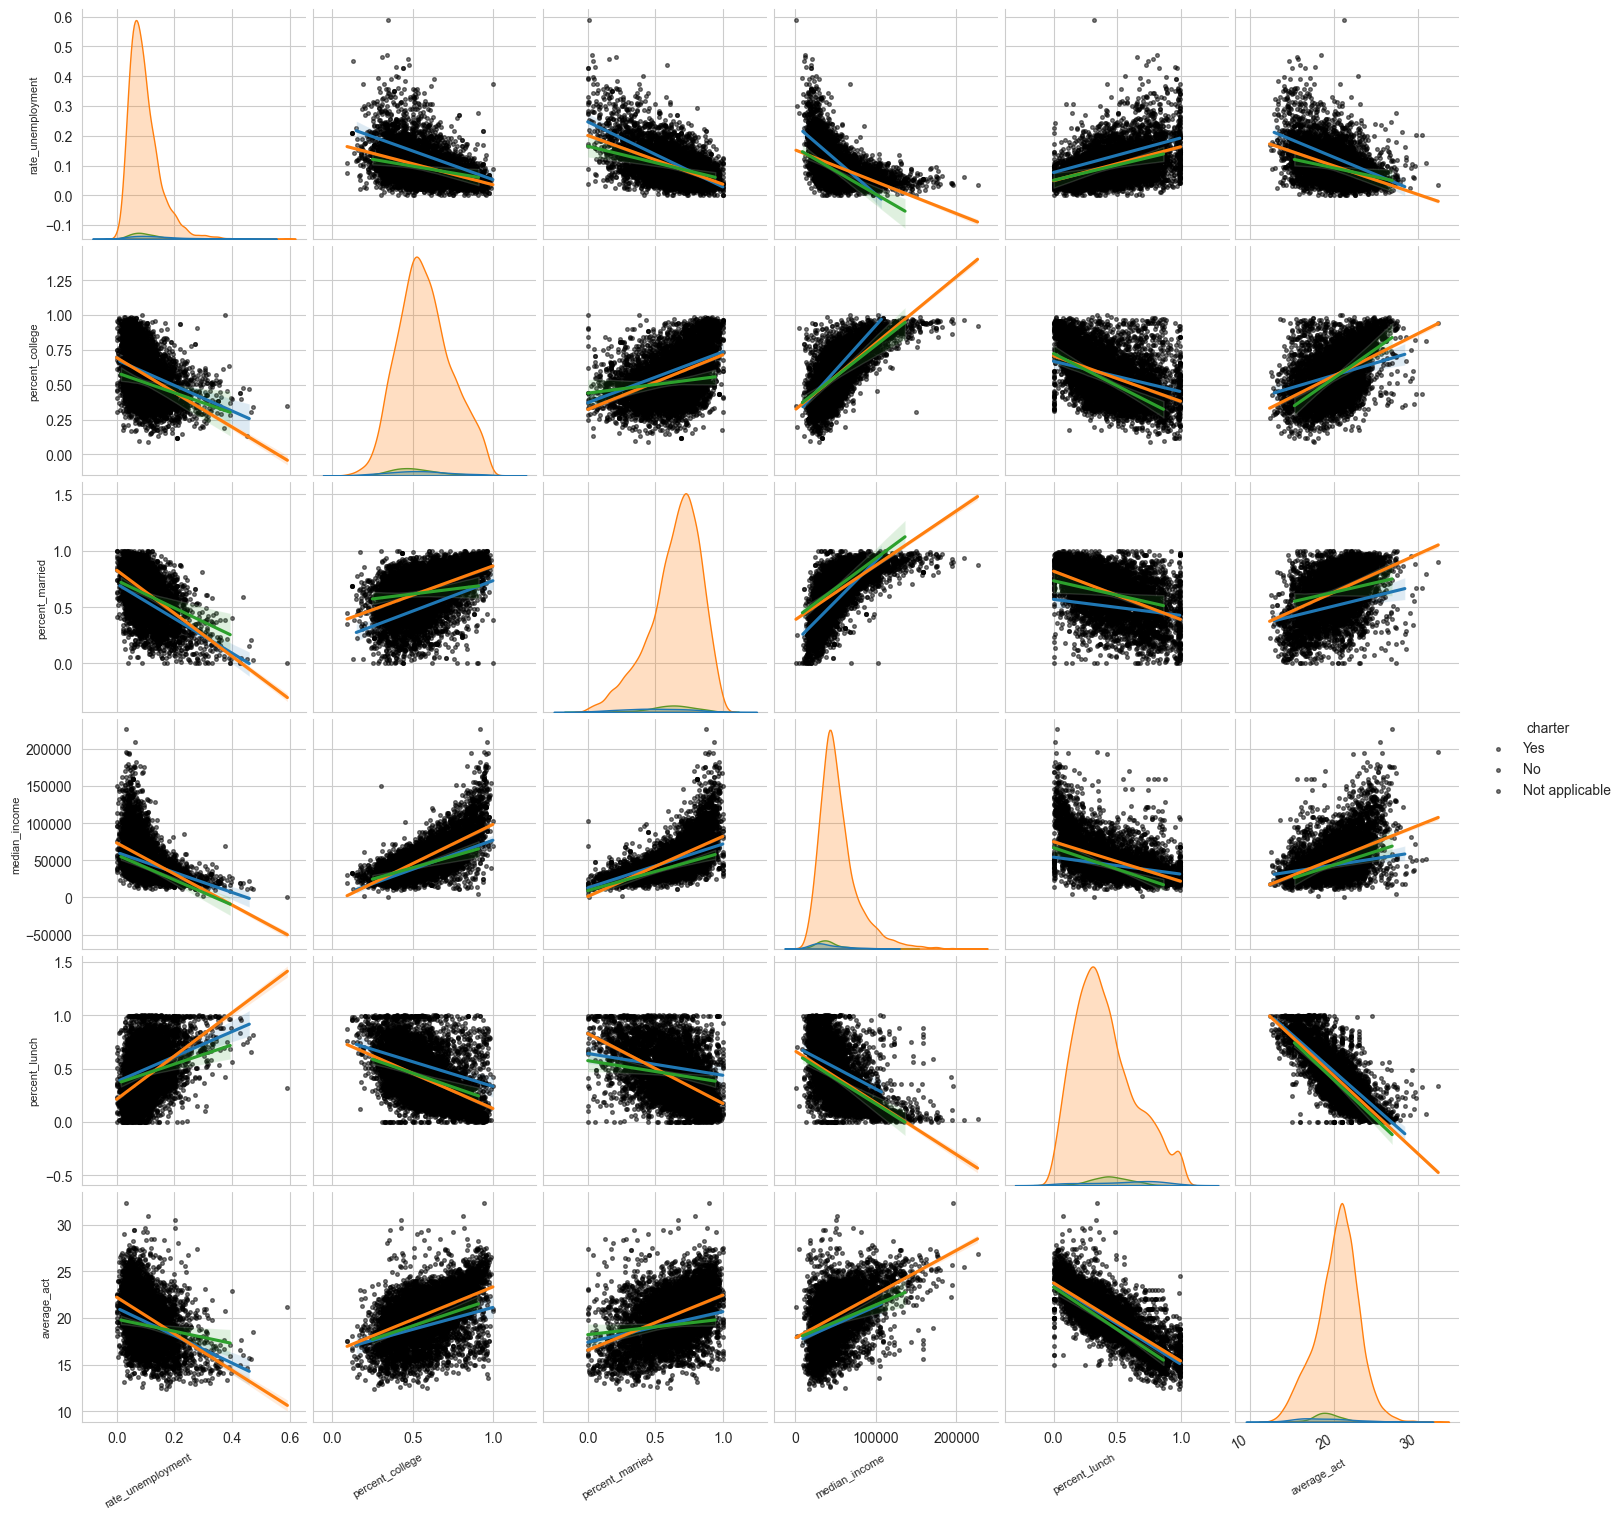

In [201]:
fig = sns.pairplot(
    data=df,
    vars=numerical_predictors + ['average_act'],
    hue='charter',
    kind='reg',
    plot_kws={'scatter_kws': {'alpha': 0.5, 'color': 'k', 's': 7}},
)

for ax in fig.axes.flat:
    if ax.get_xlabel() == 'CT Median Household Income':
        # Applying scientific notation on this axis
        ax.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
    # X-axis label size and rotation
    ax.set_xlabel(ax.get_xlabel(), fontsize=8, rotation=30, ha='right')
    # Y-axis label size
    ax.set_ylabel(ax.get_ylabel(), fontsize=8)

# Rotate x-axis tick labels
plt.setp(ax.get_xticklabels(), rotation=30, ha='right')

plt.show()


What I can see here:
- There is a socioeconomics impact such that average ACT scores show a clear positive relationship with community wealth and education (median_income and percent college). There is also a strong negative relationship with poverty indicators (percent_lunch, rate_unemployment)

- Charter categories (yes, no, not applicable) regression line are quite similar across all plot. This possibly mean that the relationship between socioeconomic factos and ACT scores is consistent regardless whether school is charter or not

- The diagonal distribution of each variable are mostly skewed, especially median_income and rate_unemployment.

### Checking Outliers through Visualization

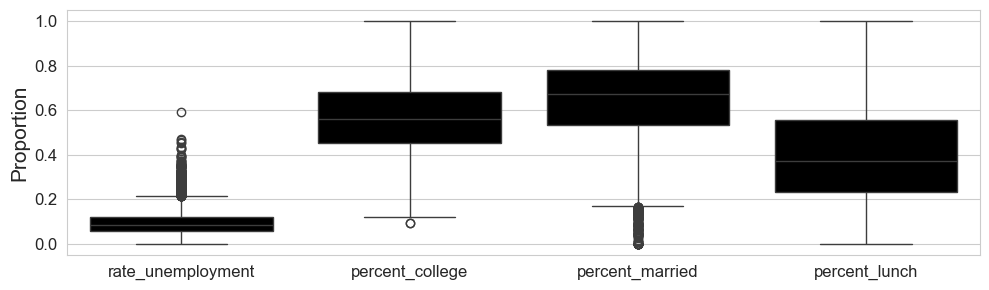

In [202]:
plt.figure(figsize=(10, 3))
fractions = list(numerical_predictors)       # copy so we don't mutate the original

fractions.remove('median_income')

sns.boxplot(data=df[fractions], color='k')
plt.ylabel('Proportion', fontsize=15)
plt.tick_params(labelsize=12)
plt.tight_layout()
plt.show()



- Unemployment rate is heavily skewed, there is a significant number of outiers with much higher employment rate
- There is a small outlier in percentage of adult with a college degree at the lower end
- The proportion of married couple families is high with highly left skewed by a long tail of outliers on the lower end
- The distribution of (percent_lunch) is fairly symmetrically distributed

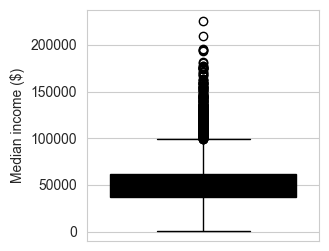

In [203]:

plt.figure(figsize=(3, 3))
sns.boxplot(data=df, y='median_income', color='k')
plt.ylabel('Median income ($)')
plt.show()

The distribution of median household income is heavily right-skewed. The median is around $50,000, but there is a long tail of high-income outliers, with some communities having median incomes well above $100,000 and even exceeding $200,000. This indicates that while most schools are in areas with moderate incomes, a significant number are in a very rich communities.

